# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных по результатам химического анализа вин - https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset

Данные являются результатом химического анализа вин, выращенных в одном и том же регионе Италии тремя разными культиваторами. Для различных компонентов, содержащихся в трех типах вина, проводится тринадцать различных измерений.

Датасет состоит из одного файла, подключаемого через функцию библиотеки sklearn.

Каждый файл содержит следующие колонки:
- Алкоголь
- Яблочная кислота
- Пепел
- Щелочность золы
- Магний
- Всего фенолов
- Флавоноиды
- Нефлаваноидные фенолы
- Проантоцианы
- Интенсивность цвета
- Оттенок
- OD280/OD315 разбавленных вин
- Пролин

# Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных (вины Фишера)

In [3]:
wine = load_wine()

In [4]:
type(wine)

sklearn.utils._bunch.Bunch

In [5]:
# Датасет возвращается в виде словаря со следующими ключами
for x in wine:
    print(x)

data
target
frame
target_names
DESCR
feature_names


In [6]:
wine['target_names']

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
# Размерность данных
wine['data'].shape

(178, 13)

In [9]:
# Размерность целевого признака
wine['target'].shape

(178,)

In [10]:
data = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

In [11]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


## 2) Основные характеристики датасета

In [12]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [13]:
data.shape

(178, 14)

In [14]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 178


In [15]:
# Список колонок
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [16]:
# Список колонок с типами данных
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
target                          float64
dtype: object

In [17]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0
target - 0


In [18]:
# Основные статистические характеристки набора данных
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [19]:
# Определим уникальное значения для целевого признака
data['target'].unique()

array([0., 1., 2.])

## 3) Визуальное исследование датасета

### Диаграмма рассеяния
Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<Axes: xlabel='proline', ylabel='alcohol'>

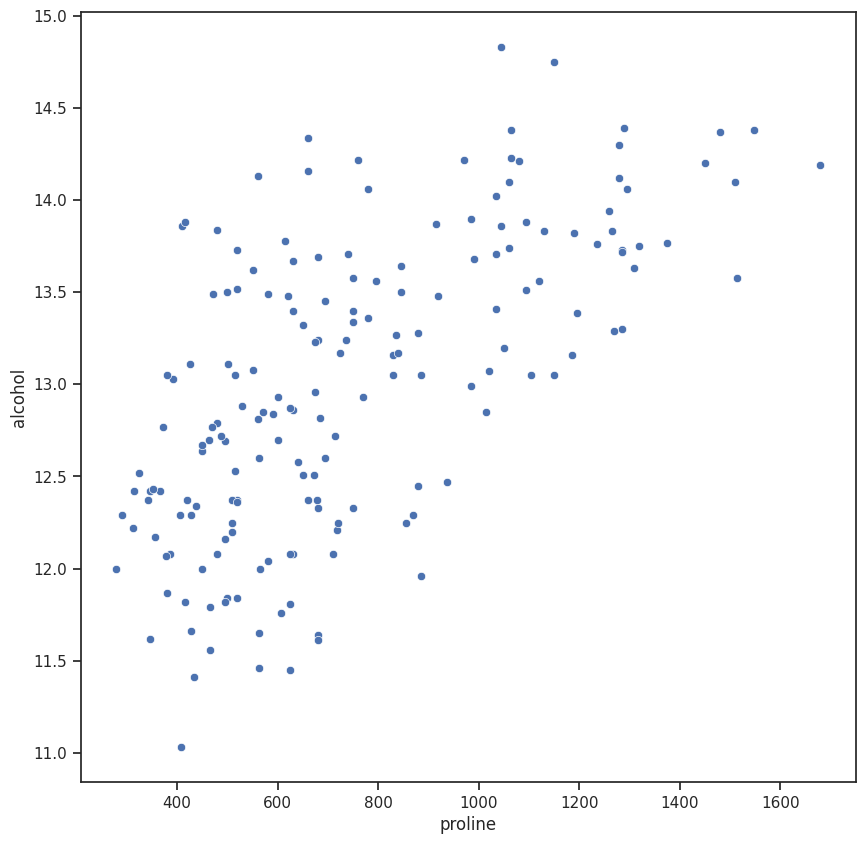

In [20]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='proline', y='alcohol', data=data)

<Axes: xlabel='proline', ylabel='alcohol'>

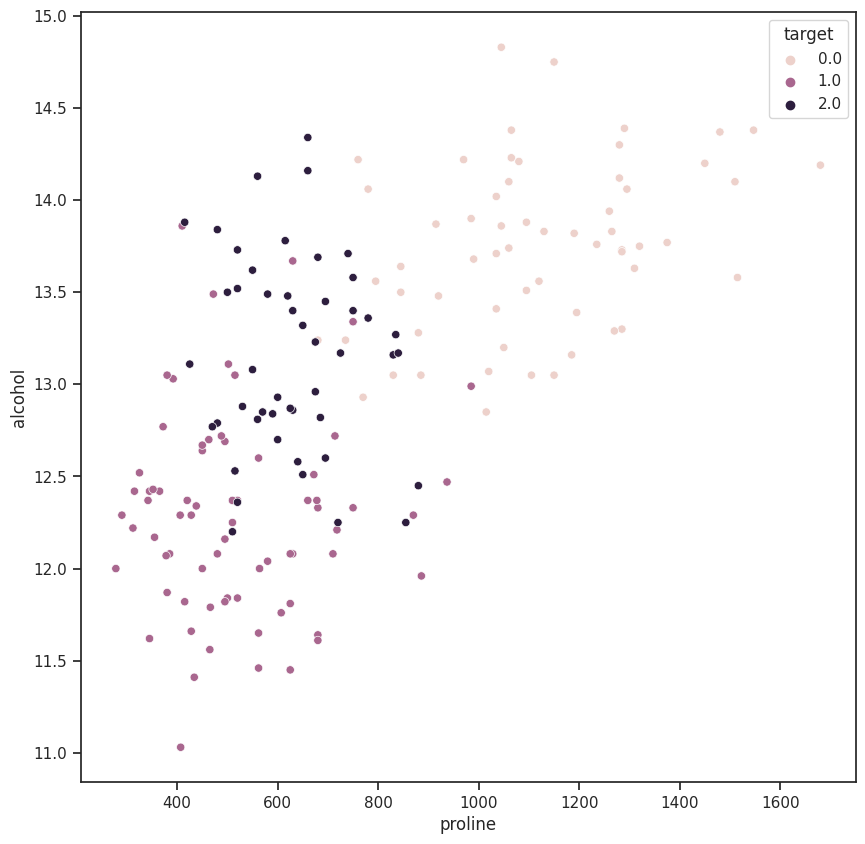

In [21]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='proline', y='alcohol', data=data, hue='target')

### Гистограмма
Позволяет оценить плотность вероятности распределения данных.

<ipython-input-22-9ff1e98351fe>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['proline'])


<Axes: xlabel='proline', ylabel='Density'>

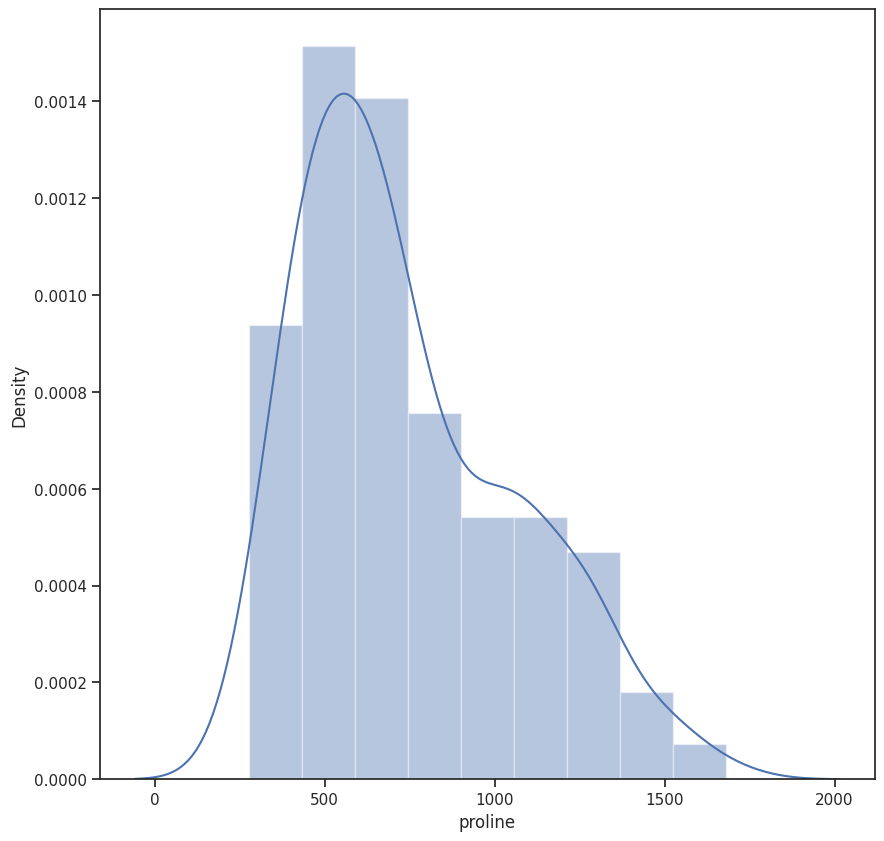

In [22]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['proline'])

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

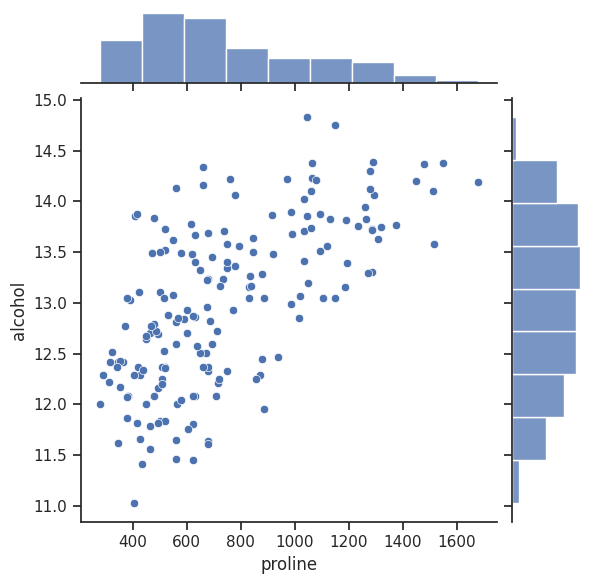

In [23]:
sns.jointplot(x='proline', y='alcohol', data=data)

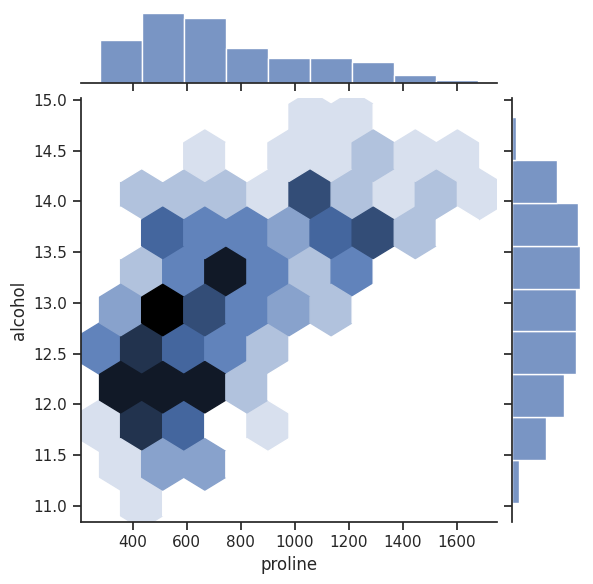

In [24]:
sns.jointplot(x='proline', y='alcohol', data=data, kind="hex")

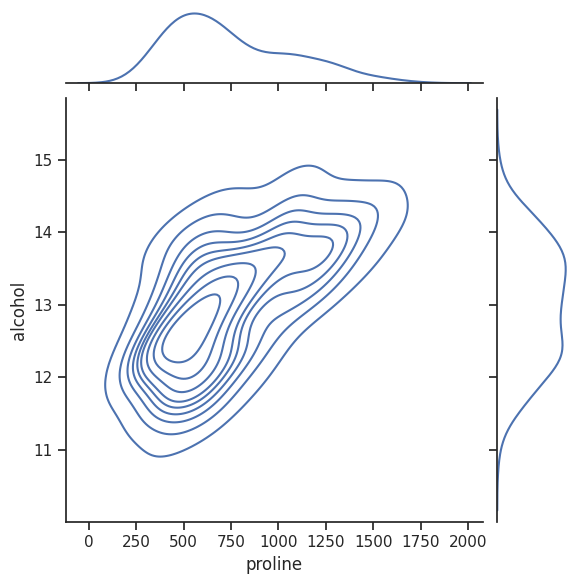

In [25]:
sns.jointplot(x='proline', y='alcohol', data=data, kind="kde")

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

In [ ]:
sns.pairplot(data)

In [ ]:
sns.pairplot(data, hue="target")

### Ящик с усами
Отображает одномерное распределение вероятности.

<Axes: xlabel='proline'>

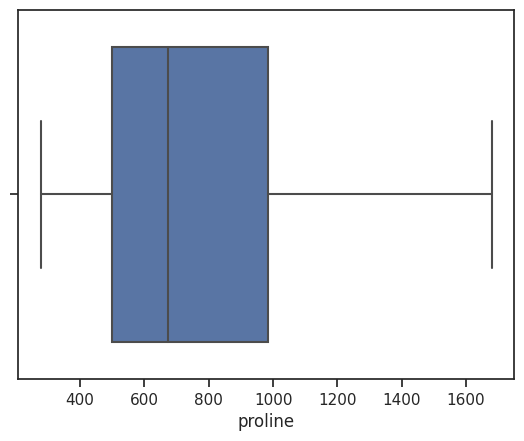

In [ ]:
sns.boxplot(x=data['proline'])

<Axes: ylabel='proline'>

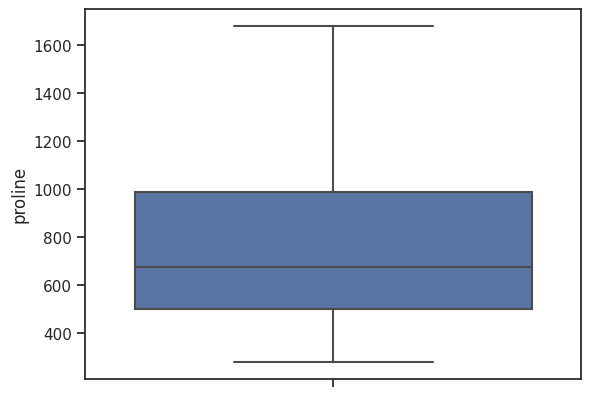

In [ ]:
# По вертикали
sns.boxplot(y=data['proline'])

<Axes: xlabel='target', ylabel='proline'>

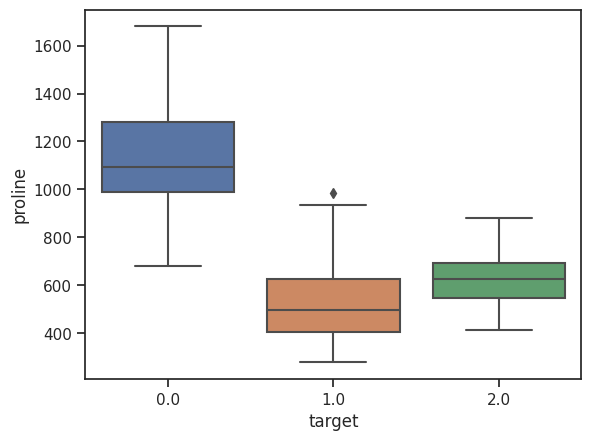

In [ ]:
# Распределение параметра target сгруппированные по propile.
sns.boxplot(x='target', y='proline', data=data)

### Violin plot
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<Axes: xlabel='proline'>

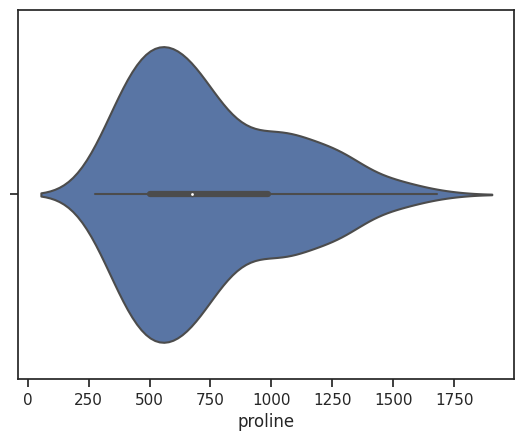

In [ ]:
sns.violinplot(x=data['proline'])

<ipython-input-32-51932606074e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['proline'], ax=ax[1])


<Axes: xlabel='proline', ylabel='Density'>

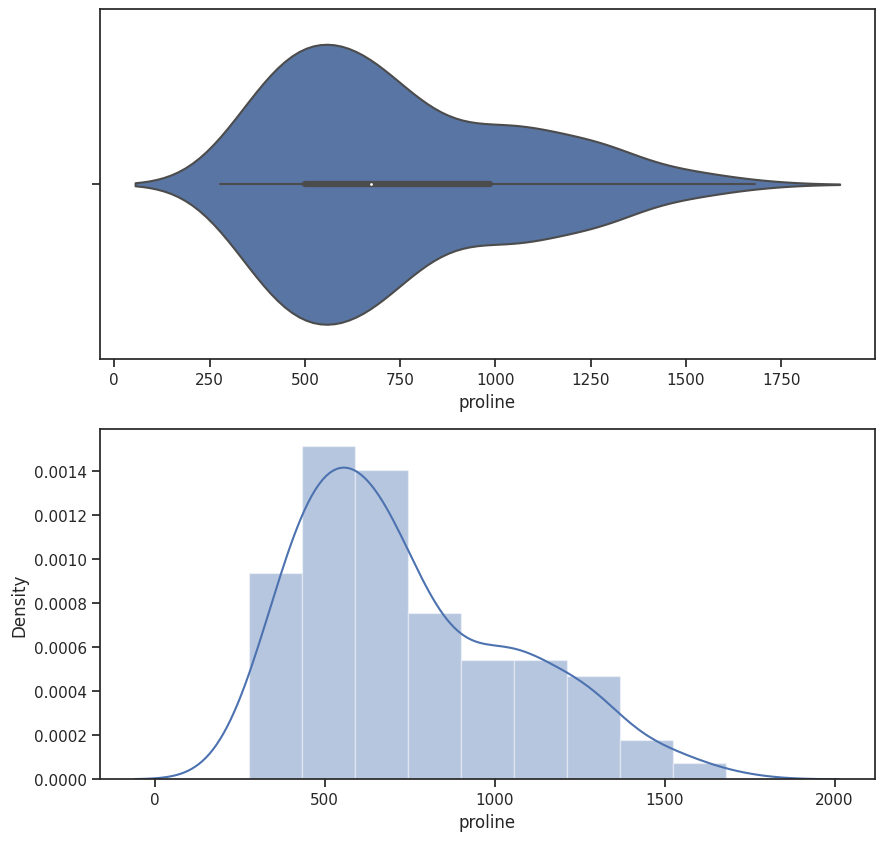

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['proline'])
sns.distplot(data['proline'], ax=ax[1])

<Axes: xlabel='target', ylabel='proline'>

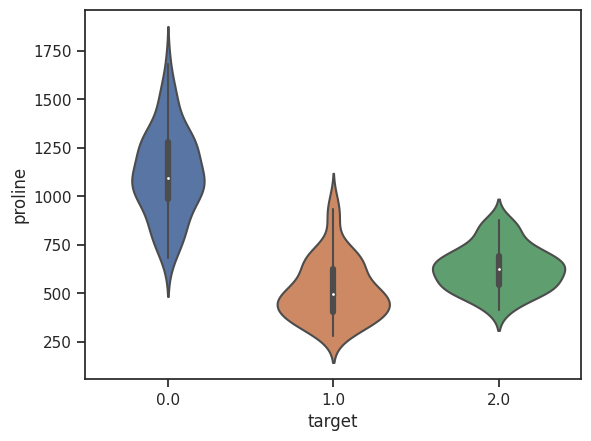

In [ ]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='target', y='proline', data=data)

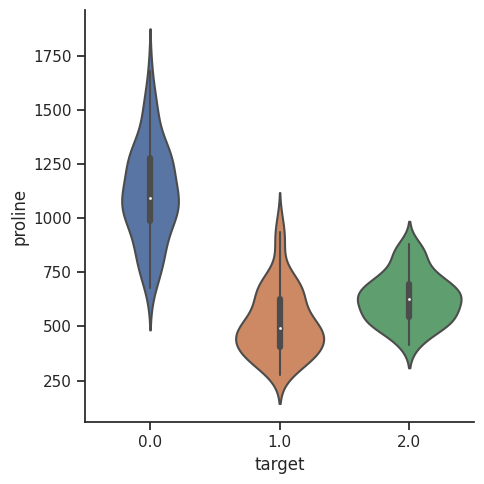

In [ ]:
sns.catplot(y='proline', x='target', data=data, kind="violin", split=True)

# 4) Информация о корреляции признаков
Проверка корреляции признаков позволяет решить две задачи:

1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "target"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:

- Целевой признак наиболее сильно коррелирует с пропиленом (-0.63), OD280/OD315 разбавленных вин (-0.79), общим кол-во фенолов (-0,71) и флавоноидами (-0,84). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с алкоголем (-0.33). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с золой (-0.05) и магнием (-0.2). Скорее всего эти признаки стоит исключить из модели, возможно они только ухудшат качество модели.

<Axes: >

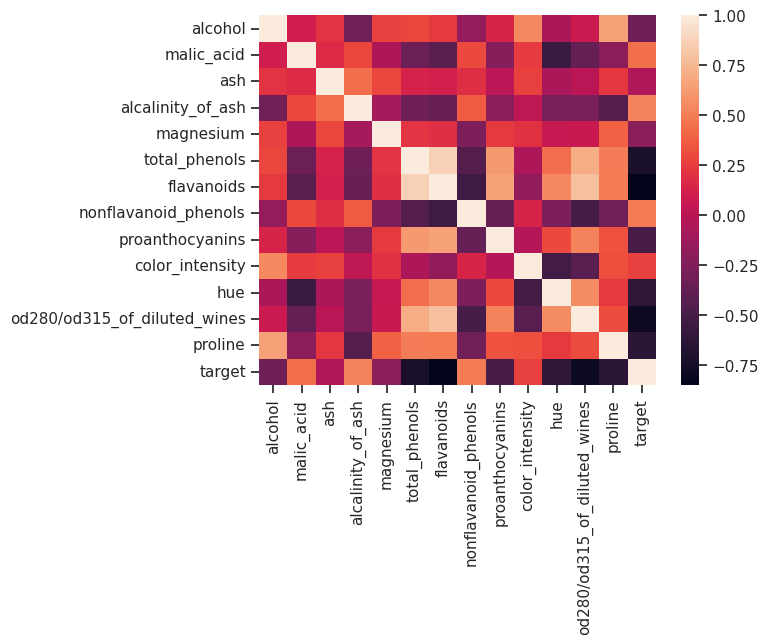

In [ ]:
sns.heatmap(data.corr())

<Axes: >

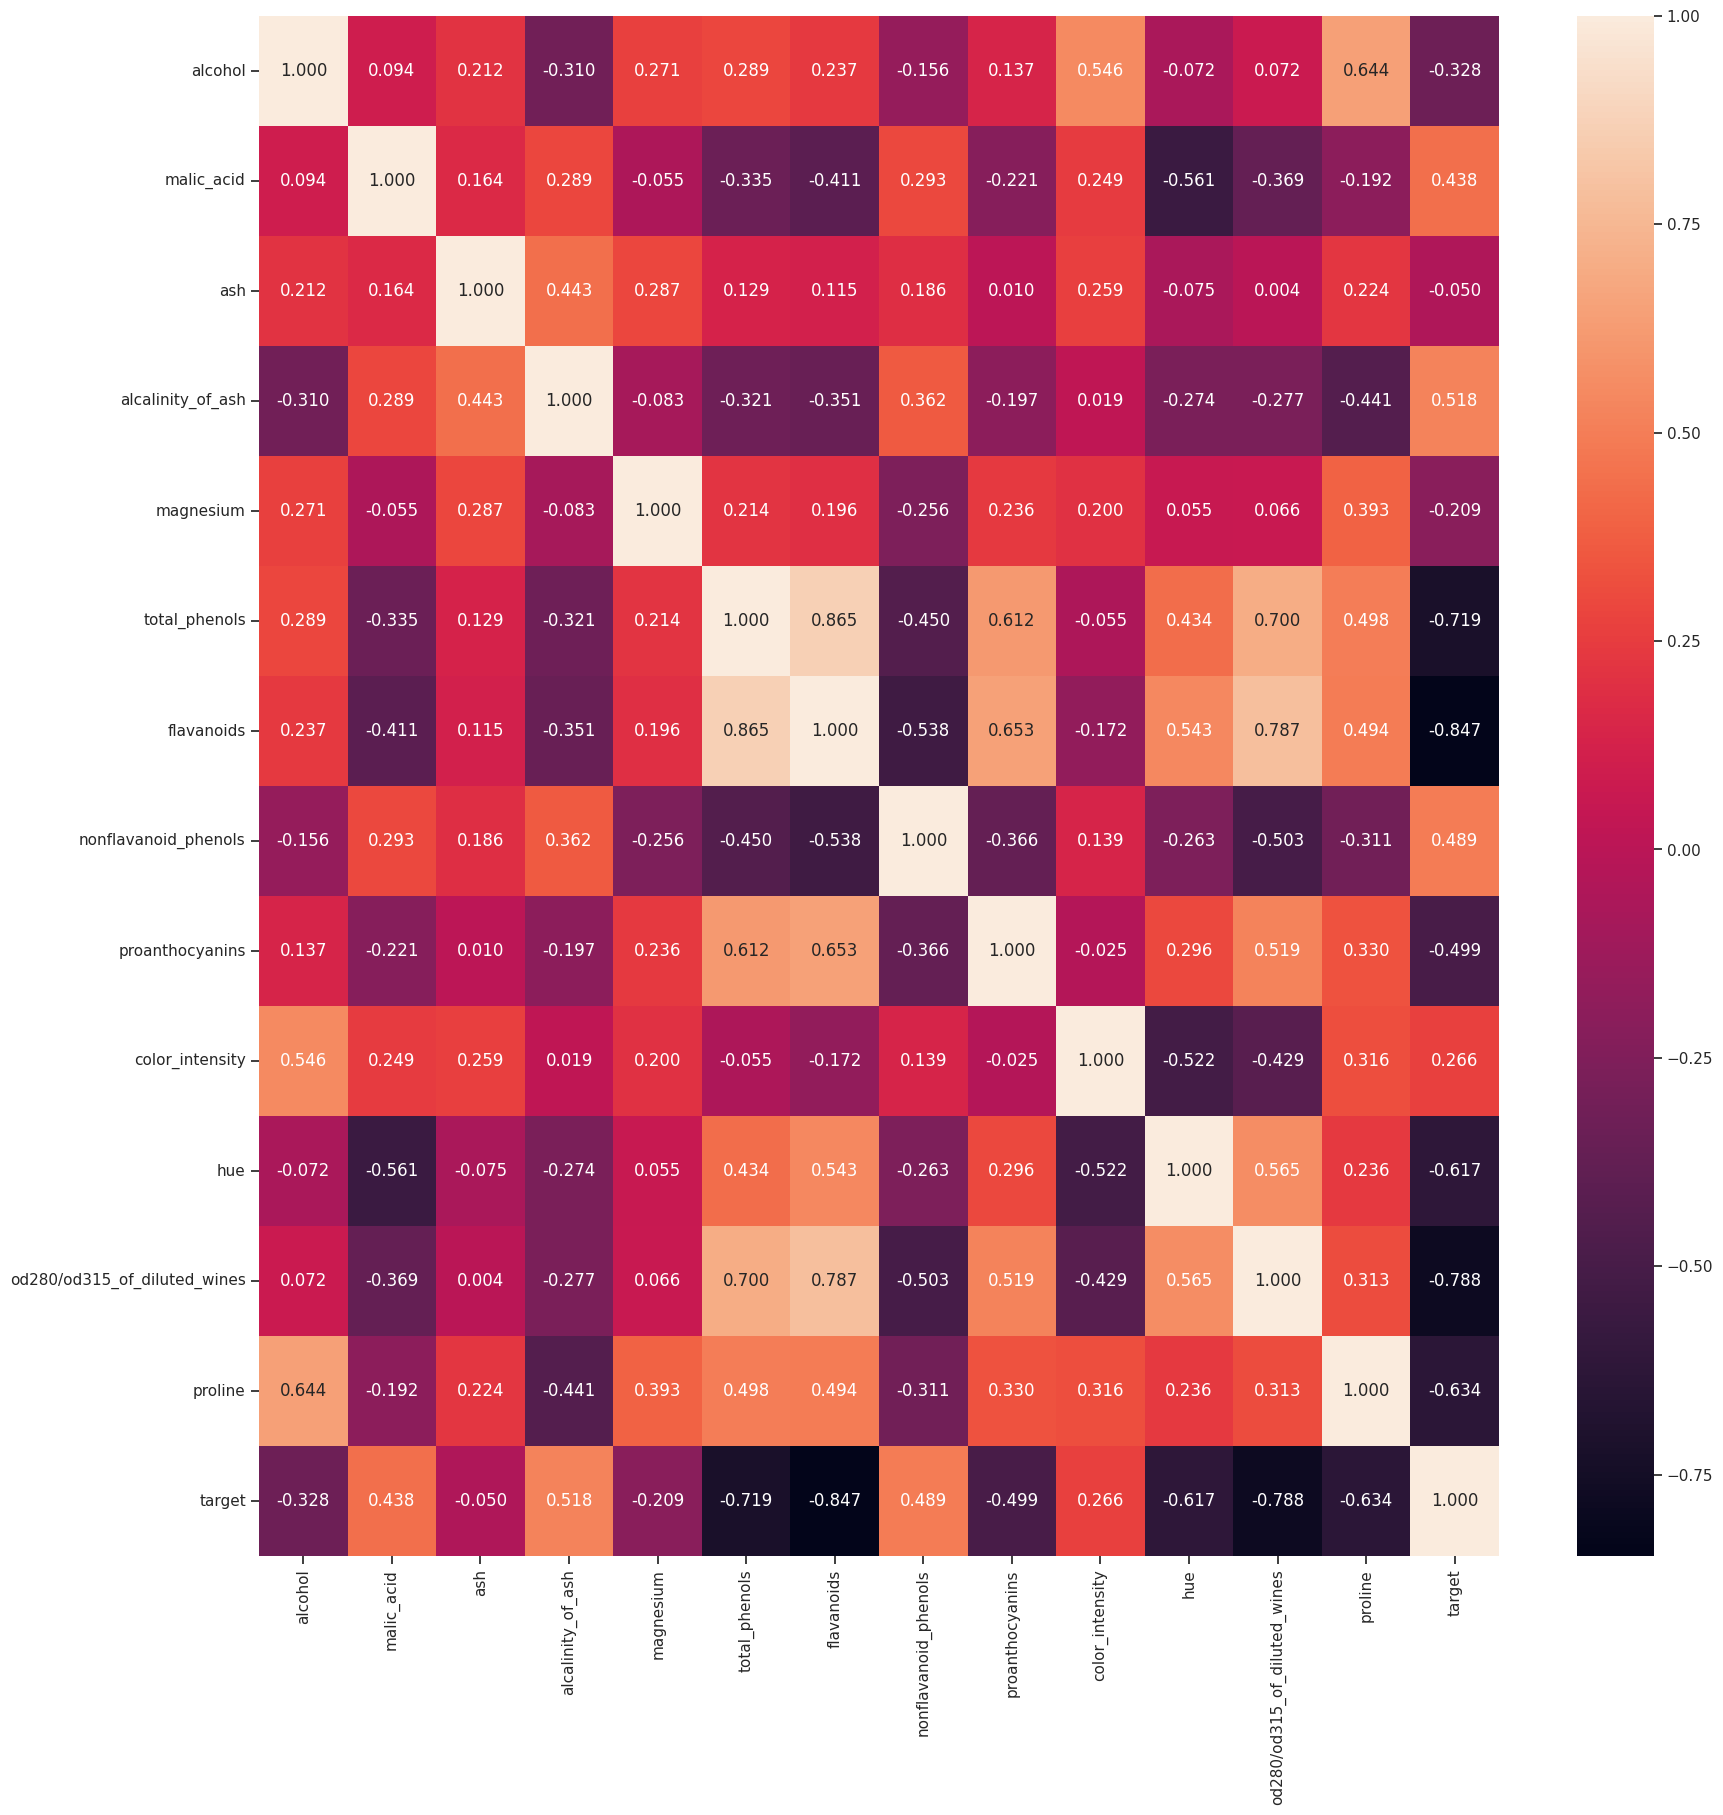

In [ ]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.3f', ax=ax)

<Axes: >

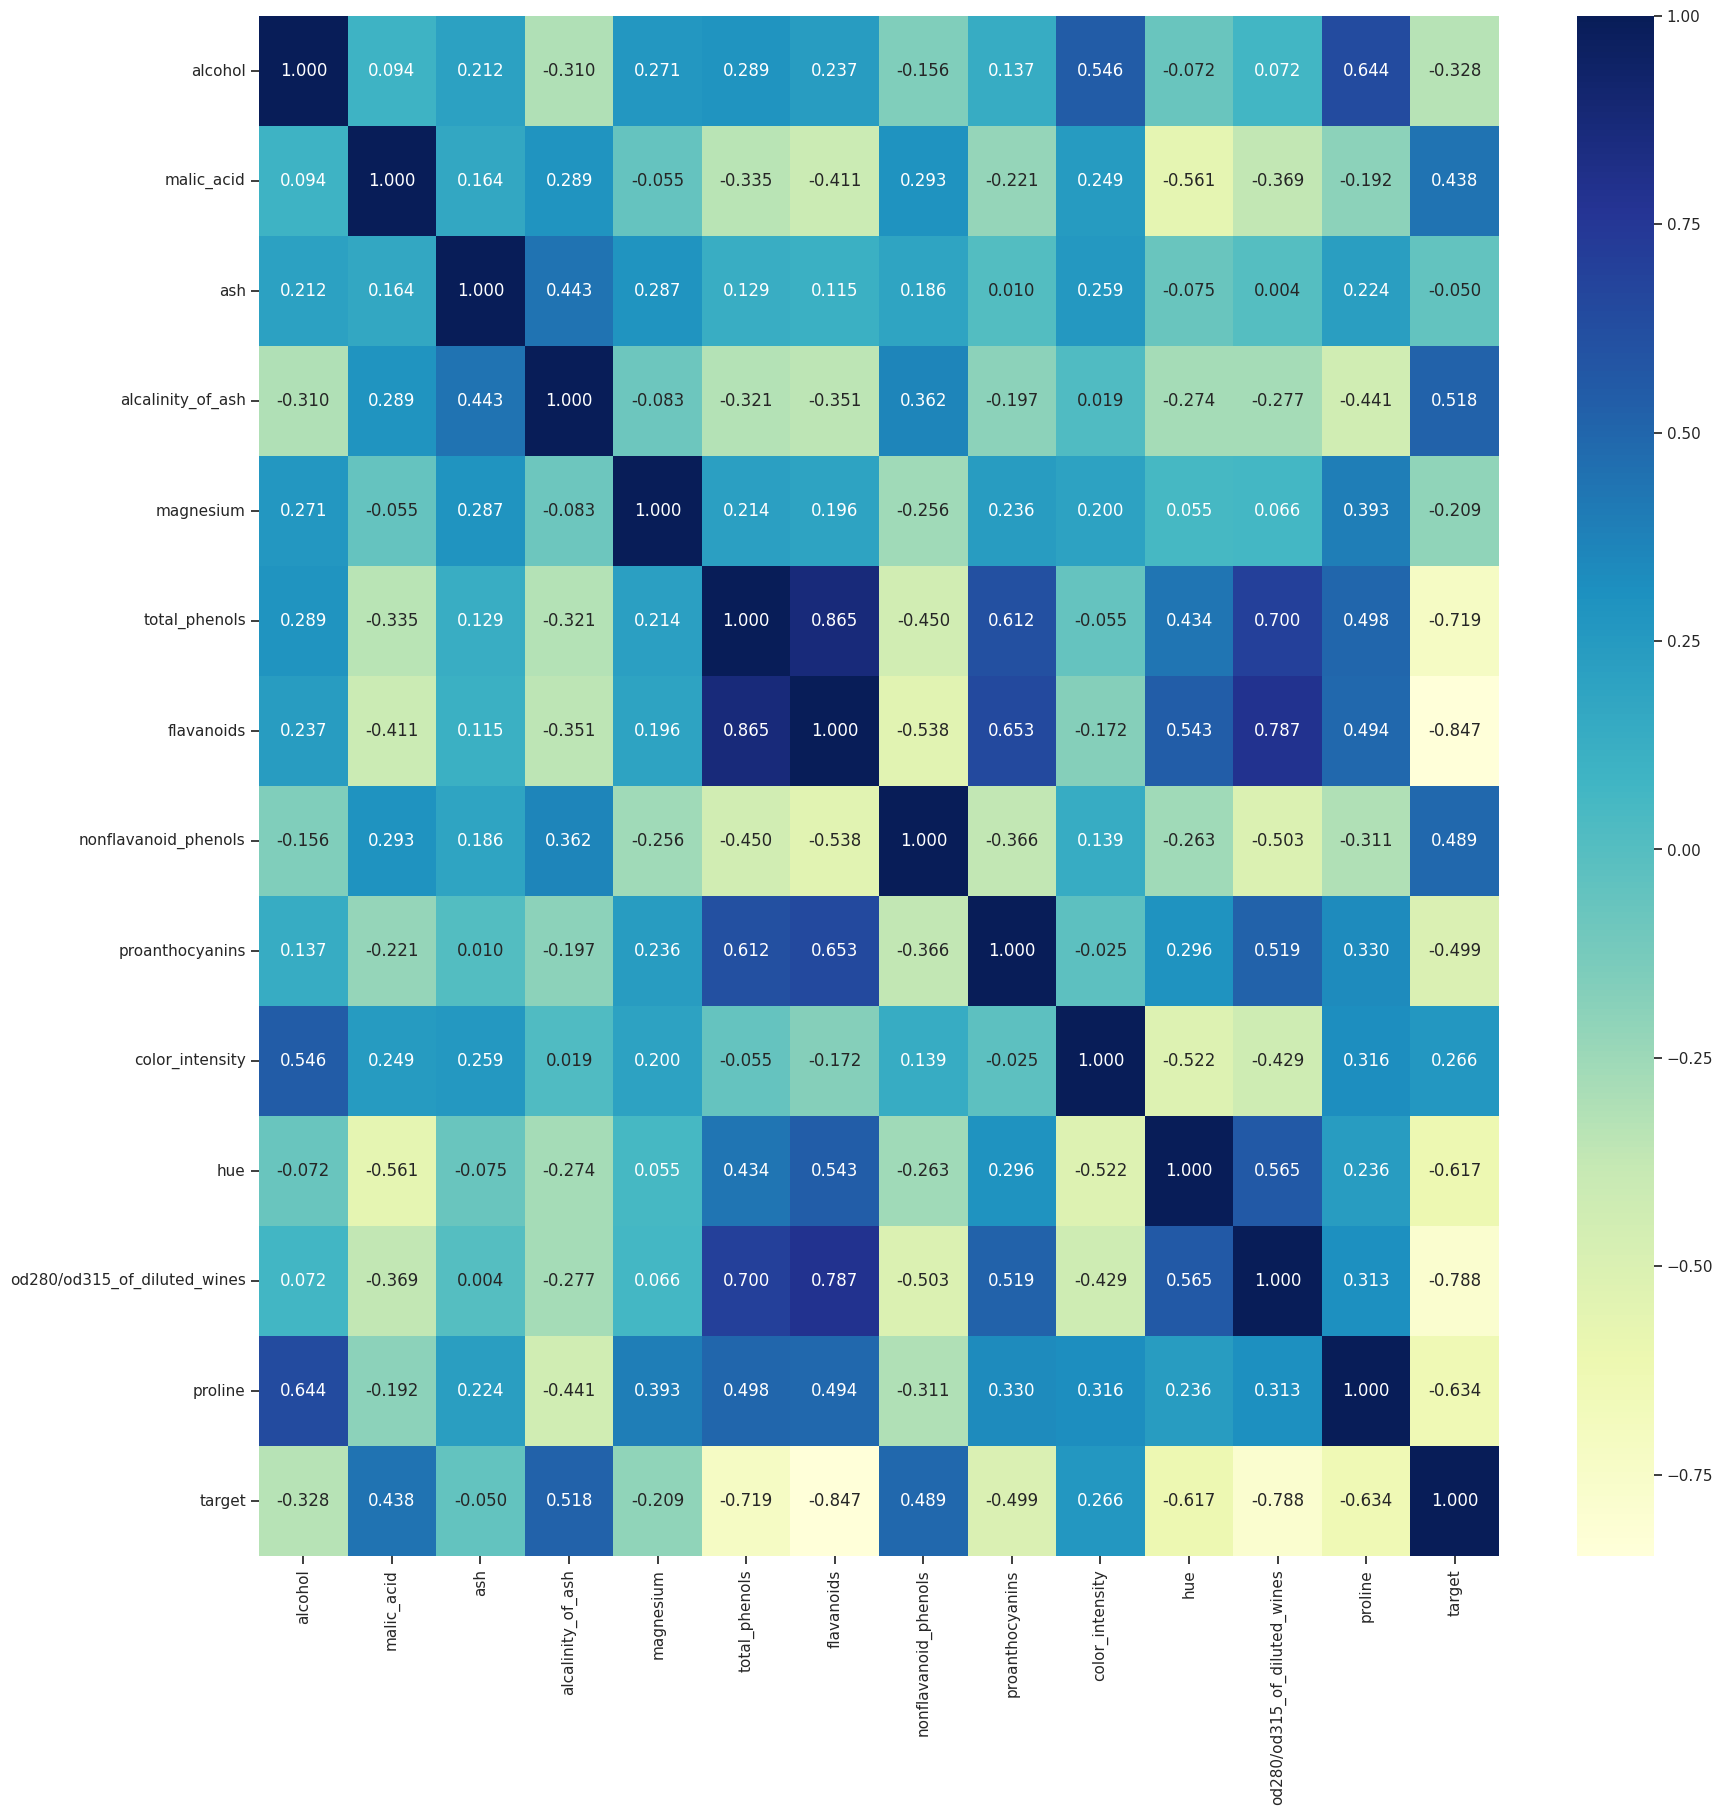

In [ ]:
# Изменение цветовой гаммы
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f', ax=ax)

<ipython-input-39-53790d770334>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data.corr(), dtype=np.bool)


<Axes: >

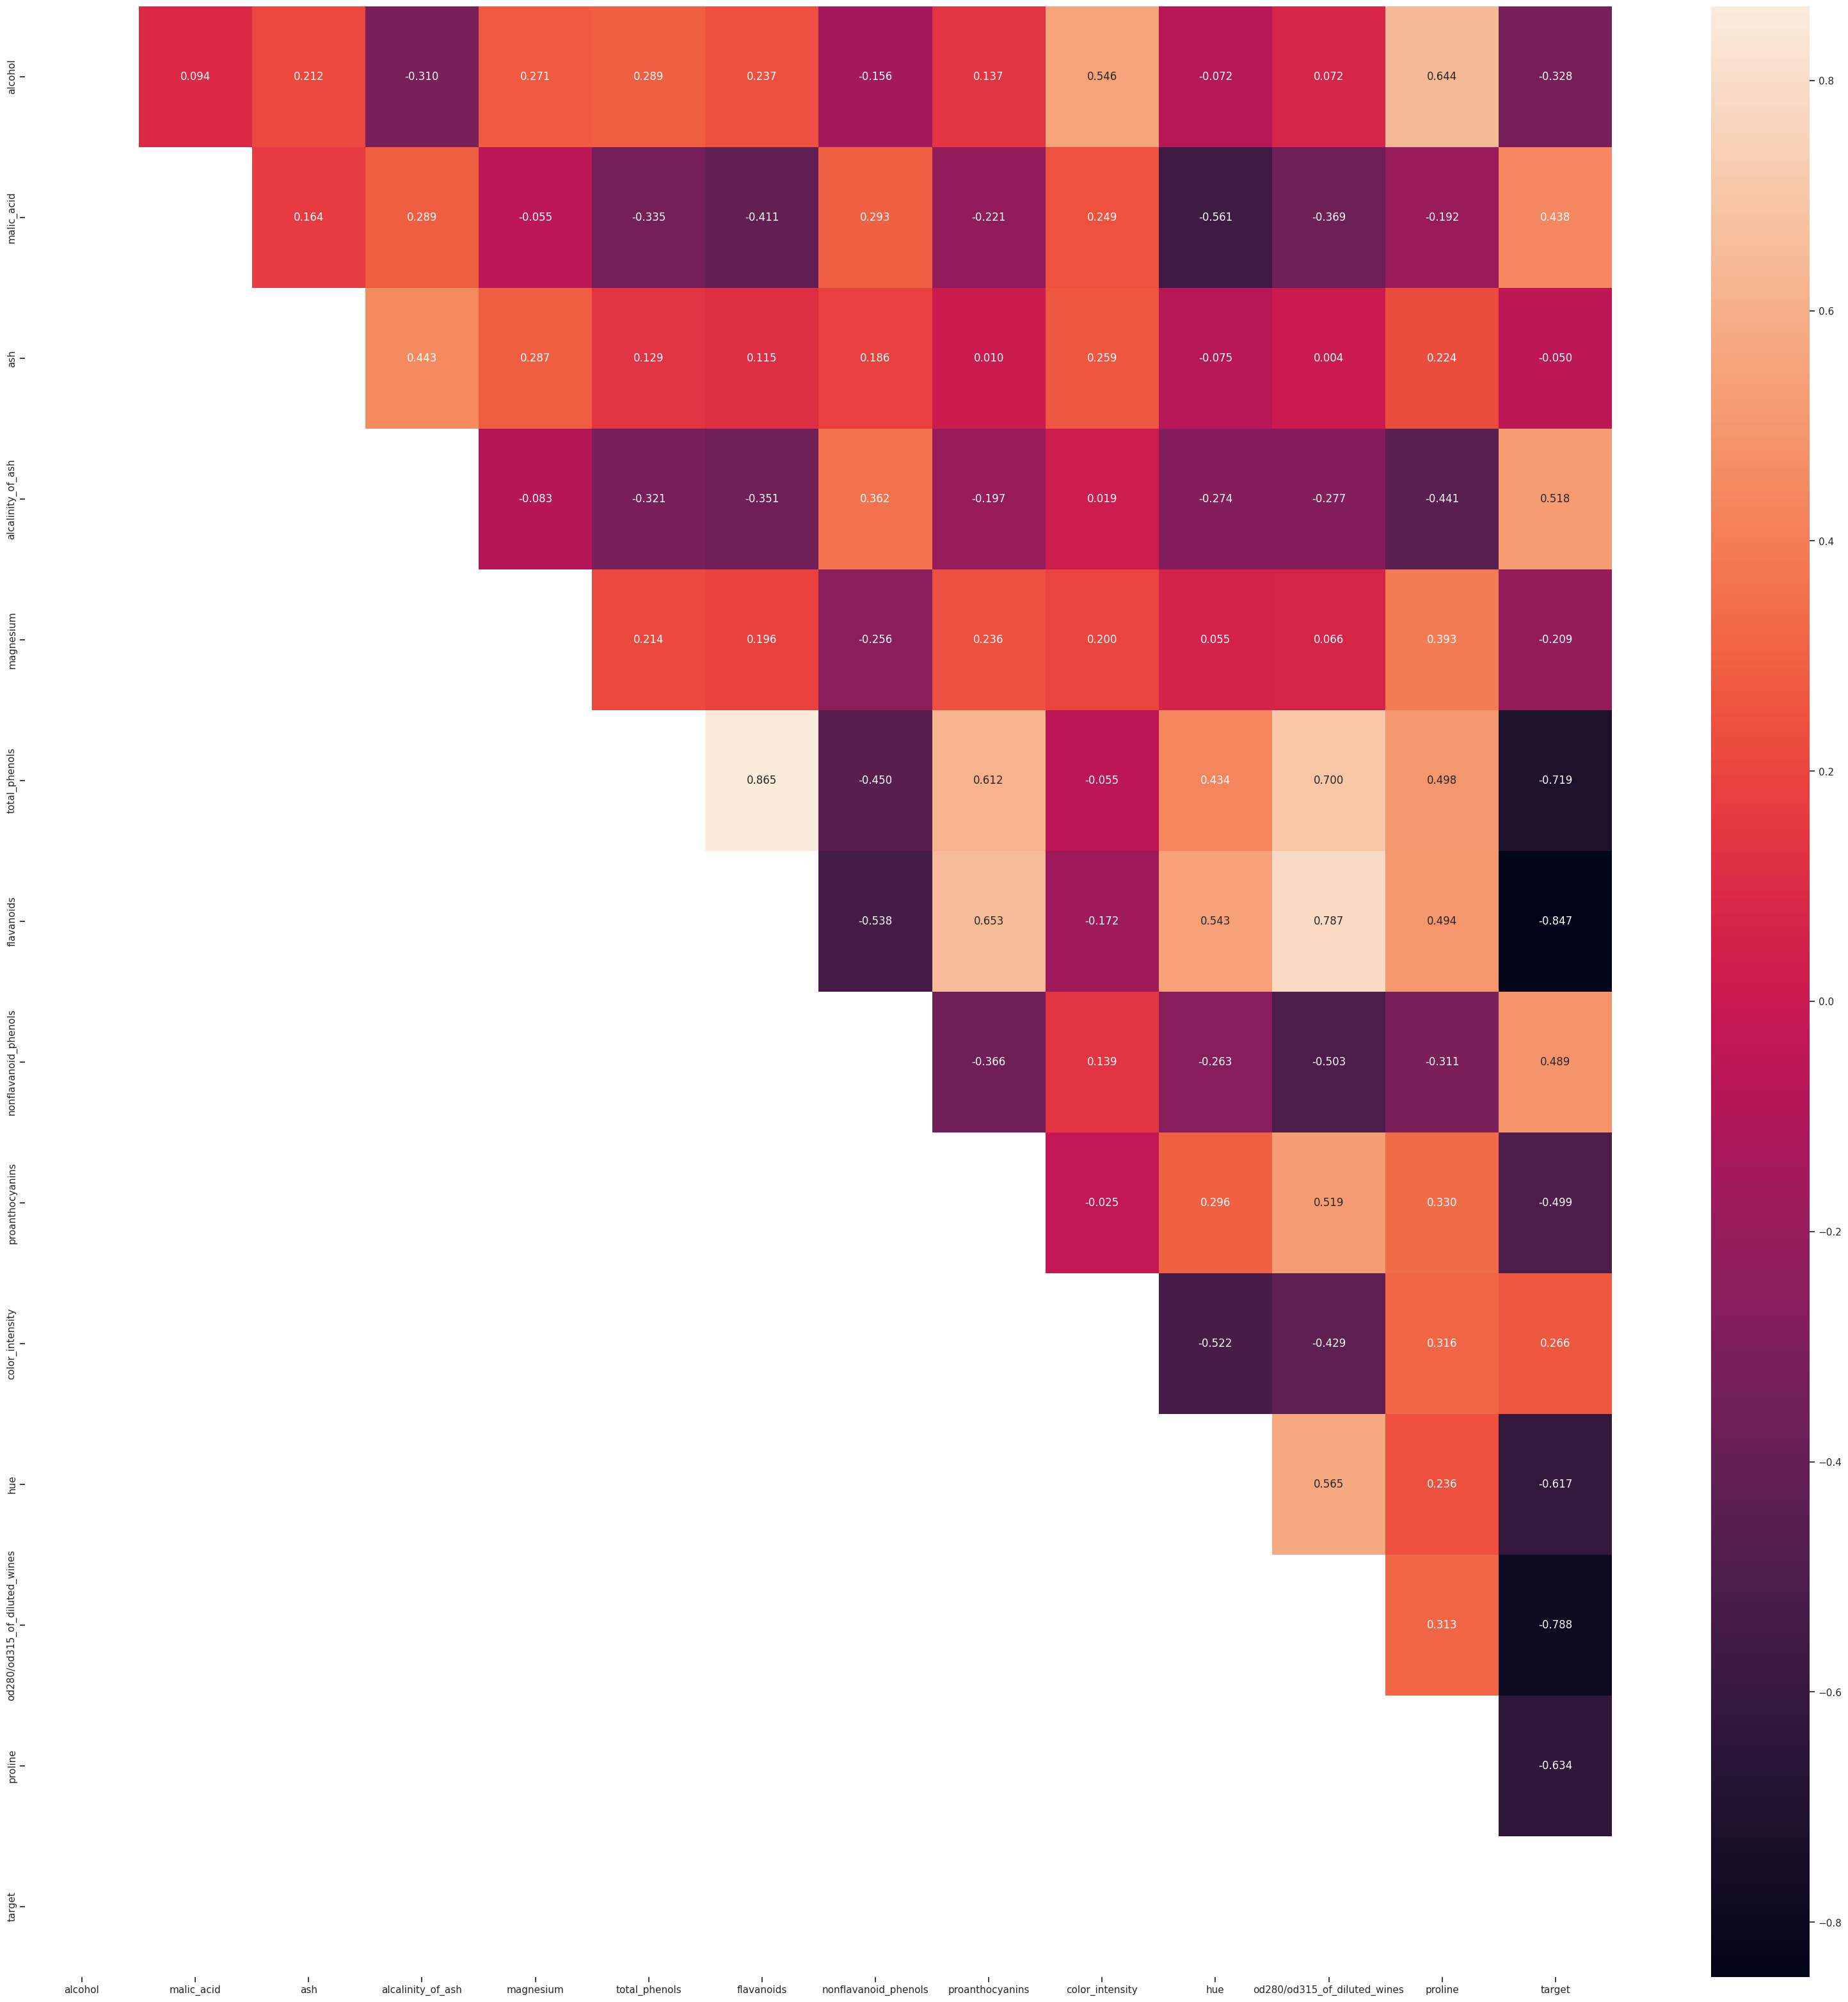

In [ ]:
# Треугольный вариант матрицы
fig, ax = plt.subplots(figsize=(40,40))
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f', ax=ax)

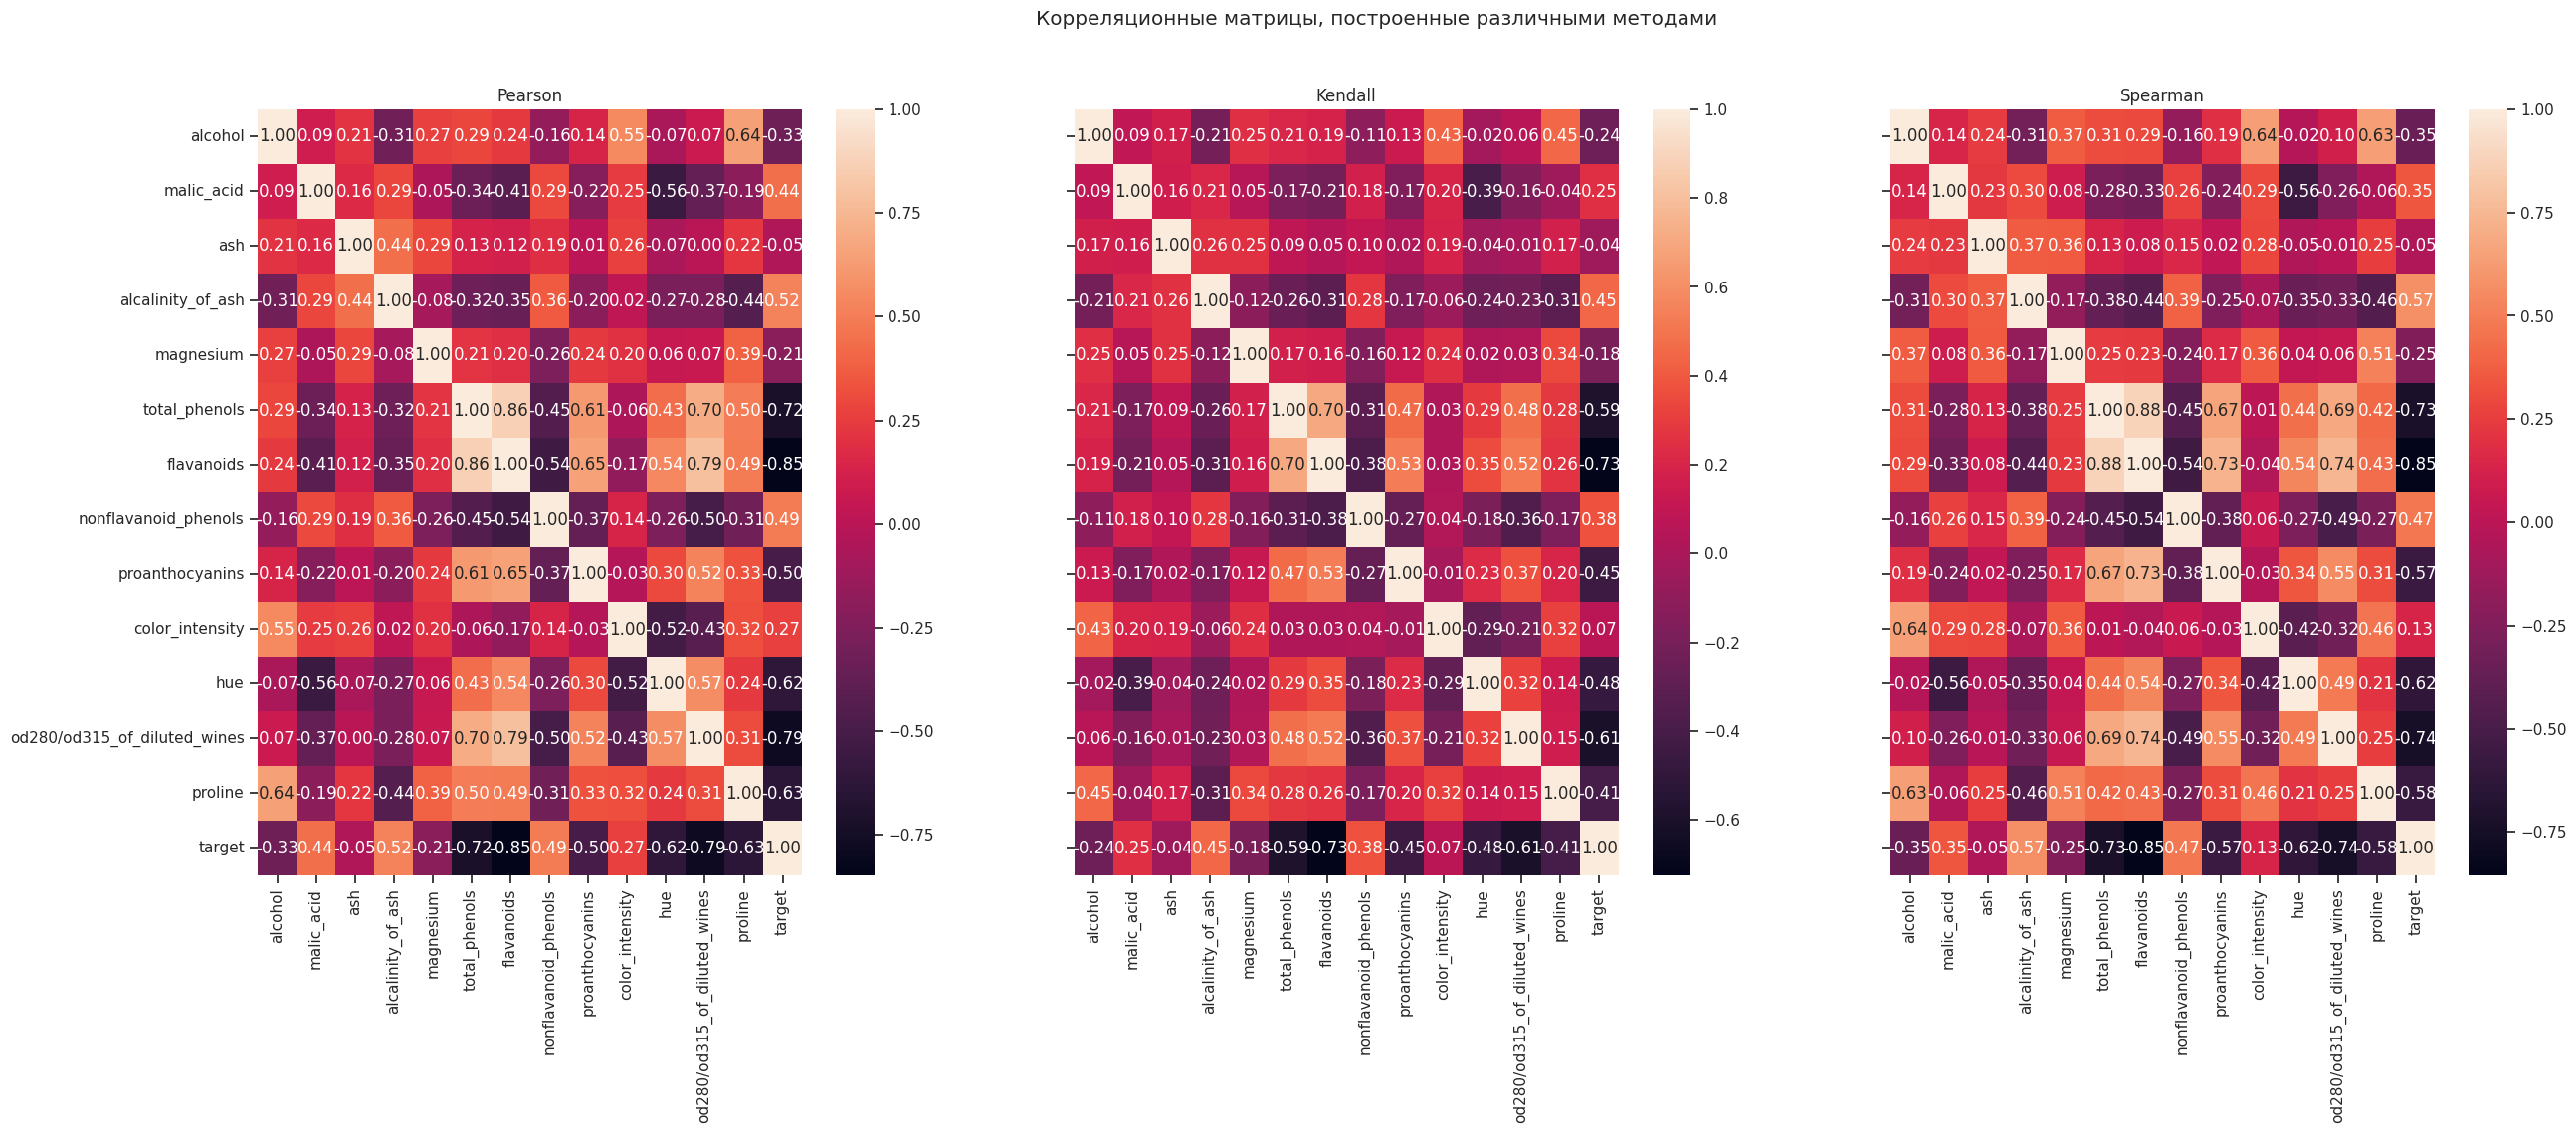

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(30,10))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

### Тепловая карта с указание размера

<Axes: >

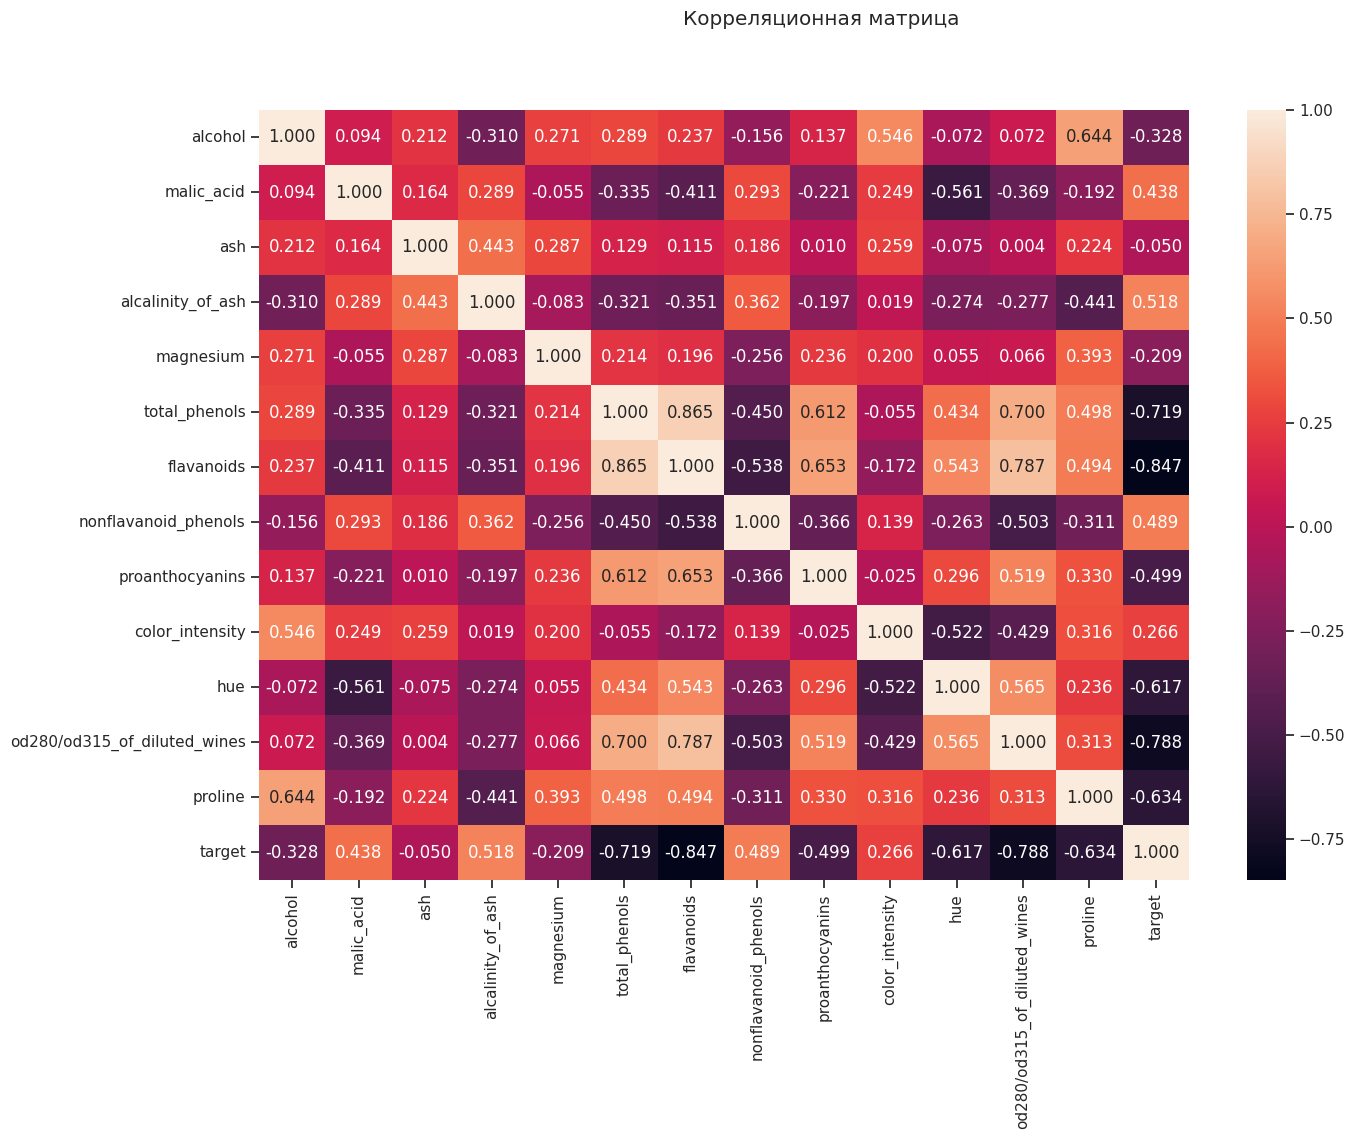

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(15,10))
fig.suptitle('Корреляционная матрица')
sns.heatmap(data.corr(), ax=ax, annot=True, fmt='.3f')